In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# Syscall By Arch

In [71]:
num_x86_calls = 608 - 247 + 1

unique_calls = {
    "x86_64": 56,
    "aarch64": 0,
    "rv64": 2
}

common_calls = num_x86_calls - unique_calls["x86_64"]

archs = ["x86_64", "rv64", "aarch64"]

syscall_archs = {}

for arch in archs:
    syscall_archs[arch] = {
        "common": common_calls,
        "unique": unique_calls[arch]
    }
print(syscall_archs)

{'x86_64': {'common': 306, 'unique': 56}, 'rv64': {'common': 306, 'unique': 2}, 'aarch64': {'common': 306, 'unique': 0}}


['x86_64', 'rv64', 'aarch64'] [306, 306, 306] green [0, 0, 0] common
['x86_64', 'rv64', 'aarch64'] [56, 2, 0] orange [306, 306, 306] arch-specific


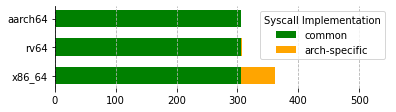

In [72]:
fig, ax = plt.subplots()
fig.set_figheight(1.5)

keys = list(syscall_archs.keys())
common_vals = [x["common"] for x in syscall_archs.values()]
unique_vals = [x["unique"] for x in syscall_archs.values()]

colors = ["green", "orange"]
labels = ["common", "arch-specific"]
lefts = [0, 0, 0]
b = []
for bars, col, label in zip([common_vals, unique_vals], colors, labels):
    print(keys, bars, col, lefts, label)
    b = ax.barh(keys, bars, left=lefts, color=col, height=0.6, label=label)
    lefts = [lefts[i] + bars[i] for i in range(len(common_vals))]

ax.set_xlim(right=550)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(linestyle='dashed')
ax.legend(title="Syscall Implementation", loc="upper right")

In [210]:
fig.savefig("figures/syscall_archs.pdf", format='pdf', dpi=600, bbox_inches='tight')

# Syscall Diagnostics

In [73]:
def parse_strace_summary(filename):
    syscalls = {}

    with open(filename, 'r') as file:
        lines = file.readlines()

        for line in lines[2:-2]:  # Skipping the headers
            parts = line.split()
            if len(parts) < 5:
                continue
            
            # Check if the 'errors' column is populated
            if parts[4].isdigit():
                syscall = parts[5]
            else:
                syscall = parts[4]
                
            calls = math.log(int(parts[3]))
            syscalls[syscall] = calls

    return syscalls

# Testing the function
sp_path = Path("syscall_profiles/")

sp_dict = {file.name.split('.')[0]: parse_strace_summary(file) for file in sp_path.iterdir()}

total_sp = {}
print(f"Num bins: {len(sp_dict)}")
for k, v in sp_dict.items():
    for sc, ct in v.items():
        if sc not in total_sp:
            total_sp[sc] = ct
        else:
            total_sp[sc] += ct
        if sc == "prlimit64":
            print(k)
print(f"Num syscalls: {len(total_sp)}")
# Total sp: syscall_freq


Num bins: 8
pbbs
sysbench
sqlite3
paho-bench
bash
memcached-testapp
runtime
Num syscalls: 103


In [74]:
#print(total_sp)
sorted_total_sp = {k: v for k, v in sorted(total_sp.items(), key=lambda item: item[1])[::-1]}
print(sorted_total_sp)

{'read': 51.07115933482176, 'write': 50.09002858515962, 'clock_nanosleep': 41.634824384691996, 'mmap': 41.01007654308474, 'openat': 39.73277585463864, 'close': 37.52859639108411, 'fstat': 33.094485381864686, 'mprotect': 32.93449936717178, 'pread64': 31.28034959591348, 'brk': 28.60251502590333, 'lseek': 28.513352507074096, 'rt_sigaction': 27.750838573033537, 'stat': 25.571087842084218, 'futex': 22.372733135469677, 'rt_sigprocmask': 21.882445861107076, 'getpid': 21.22110562047879, 'writev': 20.754382919583797, 'munmap': 20.56729760236678, 'fcntl': 20.499395621675887, 'access': 20.099865090273937, 'recvfrom': 18.094041936302055, 'getuid': 18.05965348527477, 'geteuid': 17.874808136892227, 'arch_prctl': 17.861323482596067, 'poll': 17.809216660276206, 'getrusage': 17.727267928114493, 'getegid': 17.715881946171944, 'getgid': 17.715881946171944, 'lstat': 16.997842723171782, 'ioctl': 16.095375491802045, 'clone': 15.619698473099254, 'set_robust_list': 15.275155747534061, 'prlimit64': 14.27136708

['read', 'write', 'clock_nanosleep', 'mmap', 'openat', 'close', 'fstat', 'mprotect', 'pread64', 'brk', 'lseek', 'rt_sigaction', 'stat', 'futex', 'rt_sigprocmask', 'getpid', 'writev', 'munmap', 'fcntl', 'access', 'recvfrom', 'getuid', 'geteuid', 'arch_prctl', 'poll', 'getrusage', 'getegid', 'getgid', 'lstat', 'ioctl', 'clone', 'set_robust_list', 'prlimit64', 'execve', 'dup2', 'wait4', 'sched_yield', 'sysinfo', 'getppid', 'pipe2', 'rt_sigreturn', 'mremap', 'getpgrp', 'socket', 'sendmsg', 'connect', 'getdents64', 'newfstatat', 'madvise', 'unlink', 'uname', 'getcwd', 'set_tid_address', 'pipe', 'select', 'clock_gettime', 'epoll_wait', 'readlink', 'vfork', 'chdir', 'sched_getaffinity', 'epoll_ctl', 'statfs', 'alarm', 'umask', 'gettid', 'faccessat', 'unlinkat', 'fadvise64', 'setsockopt', 'chmod', 'getxattr', 'get_mempolicy', 'set_mempolicy', 'epoll_create1', 'getsockname', 'eventfd2', 'getpeername', 'accept4', 'getrandom', 'lgetxattr', 'recvmsg', 'bind', 'fchown', 'fchmod', 'utime', 'sigaltst

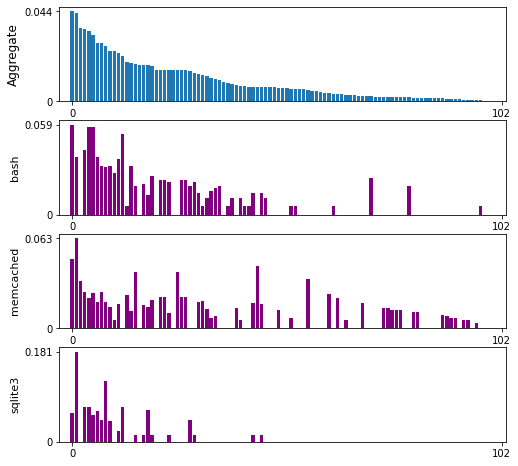

In [116]:
from matplotlib.ticker import FormatStrFormatter

N = None

def top_n(d):
    return list(d)[:N]

xscale = top_n(sorted_total_sp.keys())
print(xscale)

def plot_profile(lst, i, app_name):
    vals = np.array(top_n(lst), dtype=float)
    vals /= np.sum(vals)
    p1 = ax[i].bar(xscale, vals, color='purple')
    ax[i].set_xticks([0, len(xscale)-1], [0, len(xscale)-1])
    ax[i].set_yticks([0, np.max(vals)], [0, round(np.max(vals), 3)])
    ax[i].set_ylabel(app_name.split('-')[0], fontsize='11')
    ax[i].set_xlim(left=-3,right=len(xscale))
    

apps = ["bash", "memcached-testapp", "sqlite3"] #"paho-bench"

fig, ax = plt.subplots(1+len(apps), 1, figsize=(8, 8))

# Total
vals = np.array(top_n(sorted_total_sp.values()), dtype=float)
vals /= np.sum(vals)
p1 = ax[0].bar(xscale, vals)
ax[0].set_xticks([0, len(xscale)-1], [0, len(xscale)-1])
ax[0].set_yticks([0, np.max(vals)], [0, round(np.max(vals), 3)])
ax[0].set_ylabel("Aggregate", fontsize='12')
#ax[0].spines['top'].set_visible(False)
#ax[0].spines['right'].set_visible(False)
#ax[0].spines['left'].set_visible(False)
ax[0].set_xlim(left=-3,right=len(xscale))


i = 1
for app in apps:
    sp_app = sp_dict[app]
    sorted_sp = [sp_app[x] if x in sp_app else 0 for x in xscale]
    plot_profile(sorted_sp, i, app)
    i += 1


In [131]:
fig.savefig("figures/syscall_profile.pdf", format='pdf', dpi=600, bbox_inches='tight')

# WALI Microbenchmarks

In [117]:
# Parse file to get syscall NRs index dict\n",
#  sysidx_dict: Map SC to number\n",
#  syscall_names: Map number to SC\n",
#  call_freq_scale: Sorted by aggregate\n",
syscall_names = [None] * 500
with open("meta/syscall_list.nr", "r") as f:
    pattern = re.compile(r"__NR_(\S*)\s+(\d+)")
    matches = [pattern.search(line) for line in f.readlines()]
    sysidx_dict = {match.group(1): int(match.group(2)) for match in matches}
    for k, v in sysidx_dict.items():
        syscall_names[v] = k

call_freq_scale = sorted(sysidx_dict, key=sysidx_dict.get)
print(sysidx_dict)


{'read': 0, 'write': 1, 'open': 2, 'close': 3, 'stat': 4, 'fstat': 5, 'lstat': 6, 'poll': 7, 'lseek': 8, 'mmap': 9, 'mprotect': 10, 'munmap': 11, 'brk': 12, 'rt_sigaction': 13, 'rt_sigprocmask': 14, 'rt_sigreturn': 15, 'ioctl': 16, 'pread64': 17, 'pwrite64': 18, 'readv': 19, 'writev': 20, 'access': 21, 'pipe': 22, 'select': 23, 'sched_yield': 24, 'mremap': 25, 'msync': 26, 'mincore': 27, 'madvise': 28, 'shmget': 29, 'shmat': 30, 'shmctl': 31, 'dup': 32, 'dup2': 33, 'pause': 34, 'nanosleep': 35, 'getitimer': 36, 'alarm': 37, 'setitimer': 38, 'getpid': 39, 'sendfile': 40, 'socket': 41, 'connect': 42, 'accept': 43, 'sendto': 44, 'recvfrom': 45, 'sendmsg': 46, 'recvmsg': 47, 'shutdown': 48, 'bind': 49, 'listen': 50, 'getsockname': 51, 'getpeername': 52, 'socketpair': 53, 'setsockopt': 54, 'getsockopt': 55, 'clone': 56, 'fork': 57, 'vfork': 58, 'execve': 59, 'exit': 60, 'wait4': 61, 'kill': 62, 'uname': 63, 'semget': 64, 'semop': 65, 'semctl': 66, 'shmdt': 67, 'msgget': 68, 'msgsnd': 69, 'm

In [129]:
micro_path = Path("microbenchmarks")
nprof_path = micro_path / "native_profiles"

def profile_dict(profile_file):
    with open(profile_file) as f:
        list_stats = f.read().split(',')
        fields = ["count", "native", "virtual"]
        feats = [dict(zip(fields, [int(x) for x in re.search("(\d*):(\d*)/(\d*)", elem).groups()])) for elem in list_stats]
        for i, ft in enumerate(feats):
            final_dict = {syscall_names[i]: ft for i, ft in enumerate(feats)}
            for k, v in final_dict.items():
                final_dict[k]["overhead"] = final_dict[k]["virtual"] - final_dict[k]["native"]
            return final_dict

ndict_all = {pt.name.split('.')[0]: profile_dict(pt) for pt in nprof_path.iterdir()}

ndict_comp = {}

for sc in syscall_names:
    sc_fts = [v[sc] for v in ndict_all.values()]
    ov = 0
    ct = 0
    for ft in sc_fts:
        ov += int(ft['overhead']) * int(ft['count'])
        ct += int(ft['count'])
    ndict_comp[sc] = int(ov / ct) if ct else 0
    
#for k, v in ndict_all['lua'].items():
#    print(f"{k} => {v['count']}")
#for nd in ndict_all.values():
#    for k, v in nd.items():
#        if k in ndict_comp:
#            ndict_comp[k] += v["count"] * v["overhead"]
#        else:
#            ndict_comp[k] = v["count"] * v["overhead"]
#print(ndict_all)

read => 3
write => 0
open => 2
close => 1
stat => 0
fstat => 1
lstat => 0
poll => 0
lseek => 0
mmap => 13804
mprotect => 77
munmap => 13797
brk => 0
rt_sigaction => 2
rt_sigprocmask => 1
rt_sigreturn => 0
ioctl => 1
pread64 => 0
pwrite64 => 0
readv => 1
writev => 8
access => 1
pipe => 0
select => 0
sched_yield => 0
mremap => 0
msync => 0
mincore => 0
madvise => 0
shmget => 0
shmat => 0
shmctl => 0
dup => 0
dup2 => 0
pause => 0
nanosleep => 0
getitimer => 0
alarm => 0
setitimer => 0
getpid => 0
sendfile => 0
socket => 0
connect => 0
accept => 0
sendto => 0
recvfrom => 0
sendmsg => 0
recvmsg => 0
shutdown => 0
bind => 0
listen => 0
getsockname => 0
getpeername => 0
socketpair => 0
setsockopt => 0
getsockopt => 0
clone => 0
fork => 0
vfork => 0
execve => 0
exit => 0
wait4 => 0
kill => 0
uname => 0
semget => 0
semop => 0
semctl => 0
shmdt => 0
msgget => 0
msgsnd => 0
msgrcv => 0
msgctl => 0
fcntl => 0
flock => 0
fsync => 0
fdatasync => 0
truncate => 0
ftruncate => 0
getdents => 0
getcwd =>

In [130]:
#for k, v in final_dict.items():
print ("{:<20} {:<10}".format('Syscall', 'Overhead (ns)'))
#for k, v in sorted(ndict.items(), key=lambda x: x[1]["overhead"], reverse=True):
x = 35
rm_list = ['clock_nanosleep', 'brk', 'arch_prctl', 'set_robust_list', 'dup2', 'openat', 'execve']
add_list = ['open', 'fork']

micro_xscale = [i for i in xscale[:x] if i not in rm_list]
micro_xscale.insert(3, 'open')
micro_xscale.append('fork')

topx_dict = {k: ndict_comp[k] for k in micro_xscale[:x]}
for k, v in topx_dict.items():
    print ("{:<20} {:<10}".format(k, v))

Syscall              Overhead (ns)
read                 167       
write                151       
mmap                 512       
open                 156       
close                187       
fstat                171       
mprotect             120       
pread64              671       
lseek                178       
rt_sigaction         711       
stat                 112       
futex                141       
rt_sigprocmask       114       
getpid               168       
writev               387       
munmap               246       
fcntl                160       
access               202       
recvfrom             116       
getuid               151       
geteuid              123       
poll                 128       
getrusage            151       
getegid              164       
getgid               165       
lstat                142       
ioctl                127       
clone                554873    
prlimit64            139       
fork                 4839      


In [70]:
for sc, ov in topn_dict.items():
    print(f"    {sc} & {ov} & ---\\\\")
    print("    \hline")

NameError: name 'topn_dict' is not defined

# Overhead

In [10]:
# Obtained using 'time' command on shell and profiling-enabled WAMR runtime
overheads = {
    "lua": {
        "exec": 1212590589,
        "native": 28864706,
        "wali":    1253915
    },
    
    "bash": {
        "exec":   567840904,
        "native": 134039941,
        "wali":   6096545
    },
    
    "sqlite3": {
        "exec":   295207080,
        "native": 163690152,
        "wali":     2339408
    },
    
    "paho-bench": {
        "exec":    1276177263,
        "native":    23496869,
        "wali":       6967199
    },
    
    "memcached": {
        "exec":    2016941474,
        "native":   208279822,
        "wali":     48599042
    },
}



['lua', 'bash', 'sqlite3', 'paho-bench', 'memcached'] [0.97516176 0.75321171 0.43758273 0.97612865 0.87263941] C0 [0, 0, 0, 0, 0] wasm-app
['lua', 'bash', 'sqlite3', 'paho-bench', 'memcached'] [0.02380416 0.23605193 0.55449264 0.01841192 0.10326518] orange [0.9751617559354158, 0.7532117094544496, 0.43758273006189413, 0.9761286547854756, 0.872639406095132] kernel
['lua', 'bash', 'sqlite3', 'paho-bench', 'memcached'] [0.00103408 0.01073636 0.00792463 0.00545943 0.02409542] green [0.9989659205577094, 0.9892636388871345, 0.9920753662141164, 0.9945405711244051, 0.9759045849240147] wtkl
1.212590589
0.567840904
0.29520708
1.276177263
2.016941474


Text(0, 0.5, 'Norm Runtime')

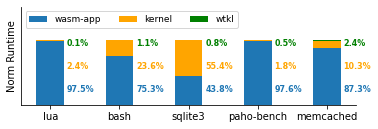

In [14]:
fig, ax = plt.subplots(1, figsize=(6, 1.8))

keys = list(overheads.keys())

app_arr = []
native_arr = []
wali_arr = []
exec_arr = []

for k, v in overheads.items():
    exec_arr.append(v["exec"])
    app_arr.append(v["exec"] - v["native"] - v["wali"])
    native_arr.append(v["native"])
    wali_arr.append(v["wali"])
    
exec_arr = np.array(exec_arr) / 1e9
app_arr = np.array(app_arr) / 1e9
native_arr = np.array(native_arr) / 1e9
wali_arr = np.array(wali_arr) / 1e9

tp = np.array(list(zip(app_arr, native_arr, wali_arr))) / np.expand_dims(exec_arr, axis=1)
tp *= 100

colors = ["C0", "orange", "green"]
labels = ["wasm-app", "kernel", "wtkl"]
bottoms = [0, 0, 0, 0, 0]
b = []
k = 0

fonts = [{'size':8, 'color':i, 'fontweight':'semibold'} for i in colors]
for bars, col, label in zip([app_arr/exec_arr, native_arr/exec_arr, wali_arr/exec_arr], colors, labels):
    print(keys, bars, col, bottoms, label)
    b = ax.bar(keys, bars, bottom=bottoms, color=col, width=0.4, label=label)
    for i in range(len(app_arr)):
        ax.text(i+0.24, 0.2 + k*0.35, f"{round(tp[i][k],1)}%", \
            ha='left', fontdict=fonts[k])
    bottoms = [bottoms[i] + bars[i] for i in range(len(app_arr))]

    k += 1
    
for i in range(len(app_arr)):
    print(exec_arr[i])
    #ax.text(i, bottoms[i] + 0.1, f"{round(tp[i][0],1), round(tp[i][1],1), round(tp[i][2],1)}", \
    #        ha='center', fontdict=font1)
    #ax.text(i+0.3, bottoms[i] + 0.1, f"{round(tp[i][0],1), round(tp[i][1],1), round(tp[i][2],1)}", \
    #        ha='left', fontdict=font1)

ax.set_ylim(top=1.5)
ax.yaxis.set_ticks([], labels=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.grid(linestyle='dashed')
ax.legend(loc="upper left", ncols=3, fontsize=9)
ax.set_ylabel("Norm Runtime")

In [15]:
fig.savefig("figures/wali_macrobench_overhead", dpi=600, bbox_inches='tight')

In [109]:
print(list(zip([app_arr, native_arr, wali_arr])))

[(array([1.18247197, 0.42770442, 0.12917752, 1.24571319, 1.76006261]),), (array([0.02886471, 0.13403994, 0.16369015, 0.02349687, 0.20827982]),), (array([0.00125391, 0.00609655, 0.00233941, 0.0069672 , 0.04859904]),)]


# Signal Overhead

In [68]:
sigdir = Path('sigresults')
btimes = {}
apps = ['bash', 'lua', 'sqlite3', 'paho-bench']

btimes_np = {}
for bdir in sigdir.iterdir():
    btimes[bdir.name] = {x.suffix[1:] : float(open(x).read().split(',')[0]) for x in bdir.iterdir()}
    if bdir.name not in btimes_np:
        btimes_np[bdir.name] = {}
    bt = btimes_np[bdir.name]
    for x in bdir.iterdir():
        tp = x.suffix[1:]
        if tp not in bt:
            bt[tp] = []
        bt[tp].append(open(x).read().split(',')[0])

for v in btimes_np.values():
    for k in v.keys():
        v[k] = np.array(v[k], dtype=float)
print(btimes_np)
print(btimes_np['paho-bench']['sigfunc'] / btimes_np['paho-bench']['signone'])
for v in btimes_np.values():
    for k in v.keys():
        if k != 'signone':
            v[k] = ((np.mean(v[k]/v['signone']))-1)*100
#print(btimes_np)


{'lua': {'signone': array([1.02, 1.02, 1.06, 1.06]), 'sigloop': array([1.08, 1.06, 1.1 , 1.1 ]), 'sigall': array([2.11, 2.08, 2.07, 2.08]), 'sigfunc': array([1.08, 1.06, 1.06, 1.08])}, 'bash': {'sigloop': array([0.51, 0.5 , 0.52, 0.52]), 'sigfunc': array([0.53, 0.53, 0.52, 0.53]), 'signone': array([0.48, 0.48, 0.48, 0.48]), 'sigall': array([1.39, 1.35, 1.37, 1.38])}, 'paho-bench': {'sigall': array([0.47, 0.48, 0.47, 0.47]), 'signone': array([0.4, 0.4, 0.4, 0.4]), 'sigloop': array([0.4, 0.4, 0.4, 0.4]), 'sigfunc': array([0.4 , 0.4 , 0.41, 0.4 ])}, 'sqlite3': {'sigall': array([2.46, 2.45, 2.44, 2.46]), 'signone': array([0.92, 0.94, 0.92, 0.93]), 'sigfunc': array([0.99, 0.97, 0.97, 0.97]), 'sigloop': array([1.04, 1.02, 1.03, 1.03])}}
[1.01 1.01 1.02 1.01]


In [69]:
print ("{:<20} {:<10} {:<10} {:<10}".format("Application", "Loop", "Func", "All"))
for app, v in btimes_np.items():
    np.set_printoptions(precision=2, suppress=True)
    print ("{:<20} {:<10} {:<10} {:<10}".format(app, round(v['sigloop'], 1),\
                                                round(v['sigfunc'], 1),\
                                                round(v['sigall'], 1)))

Application          Loop       Func       All       
lua                  4.1        2.8        100.3     
bash                 7.1        10.0       187.0     
paho-bench           0.5        1.1        17.8      
sqlite3              11.3       5.2        164.2     
